In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pyspark import SparkContext
from pyspark.sql import SparkSession

In [2]:
sc = SparkContext("local[*]")
spark = SparkSession.builder.appName("timeseries").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

In [3]:
plt.style.use('seaborn')
msft = yf.Ticker("msft")

C:\Users\Kacper.pucylo\AppData\Local\Temp\ipykernel_20332\323650649.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
df_pd = msft.history(period="max")
# df_pd.reset_index(drop=False, inplace=True)
df_pd.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055241,0.063365,0.055241,0.060657,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060657,0.063907,0.060657,0.062823,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062823,0.064448,0.062823,0.063907,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063907,0.064448,0.061740,0.062281,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062281,0.062823,0.060657,0.061198,47894400,0.0,0.0


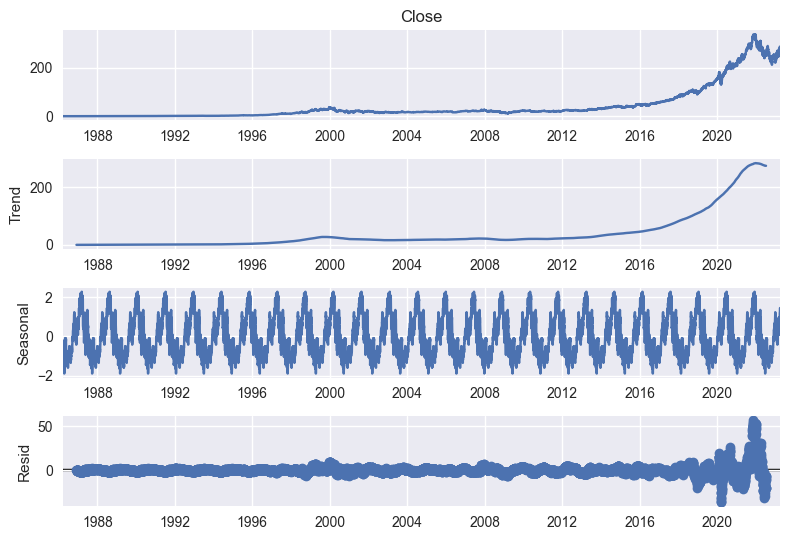

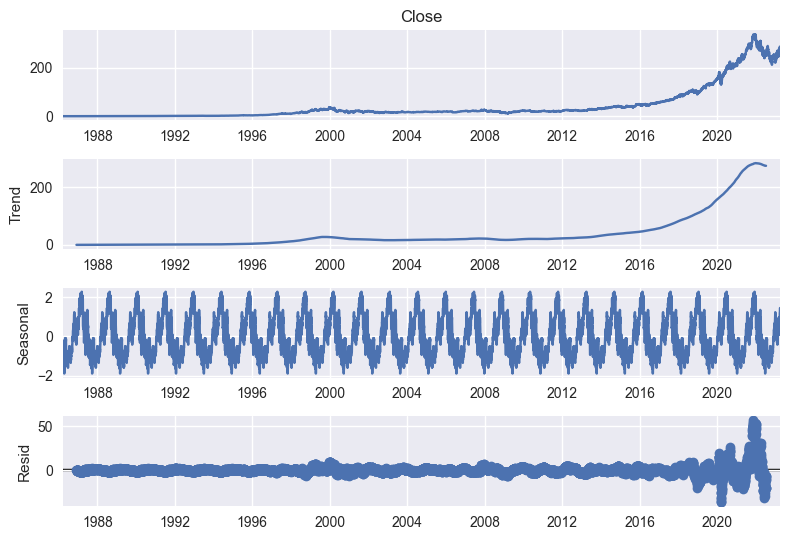

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_pd['Close'], model='additive', period=365)
result.plot()

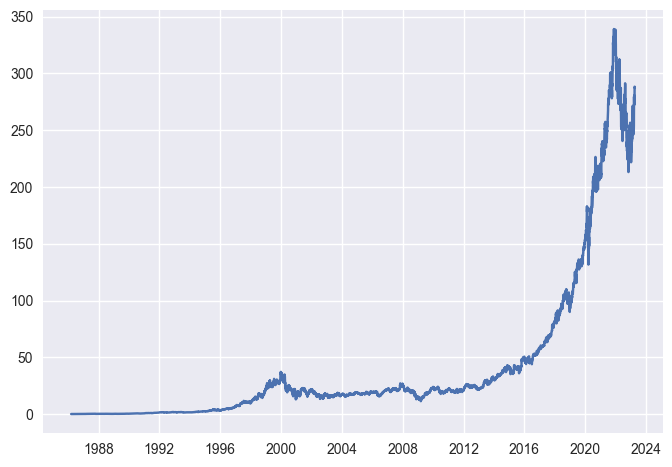

In [6]:
plt.plot(df_pd['Close'])

In [7]:
import numpy as np
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [8]:
train, test = train_test_split(df_pd['Close'], train_size=8500)

In [15]:
model = pm.auto_arima(train, seasonal=True)
preds = model.predict(test.shape[0])

C:\Users\Kacper.pucylo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


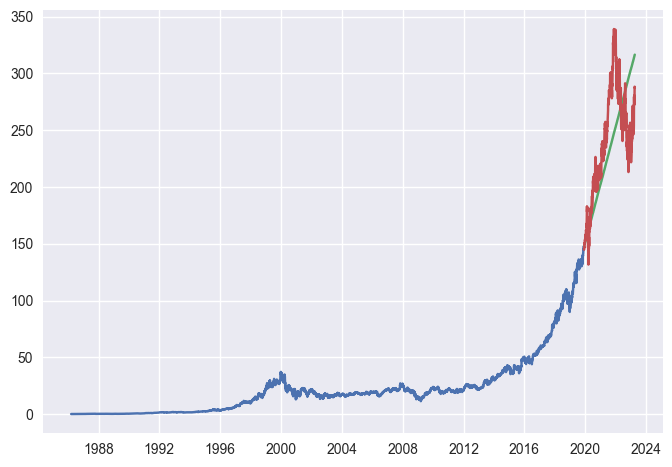

In [17]:
plt.plot(df_pd.index[:8500], train)
plt.plot(df_pd.index[8500:], preds)
plt.plot(df_pd.index[8500:], test)
plt.show()

In [11]:
print(test)

Date
2019-12-02 00:00:00-05:00    145.026627
2019-12-03 00:00:00-05:00    144.793869
2019-12-04 00:00:00-05:00    145.317596
2019-12-05 00:00:00-05:00    145.395142
2019-12-06 00:00:00-05:00    147.160126
                                ...    
2023-03-29 00:00:00-04:00    280.510010
2023-03-30 00:00:00-04:00    284.049988
2023-03-31 00:00:00-04:00    288.299988
2023-04-03 00:00:00-04:00    287.230011
2023-04-04 00:00:00-04:00    287.179993
Name: Close, Length: 841, dtype: float64


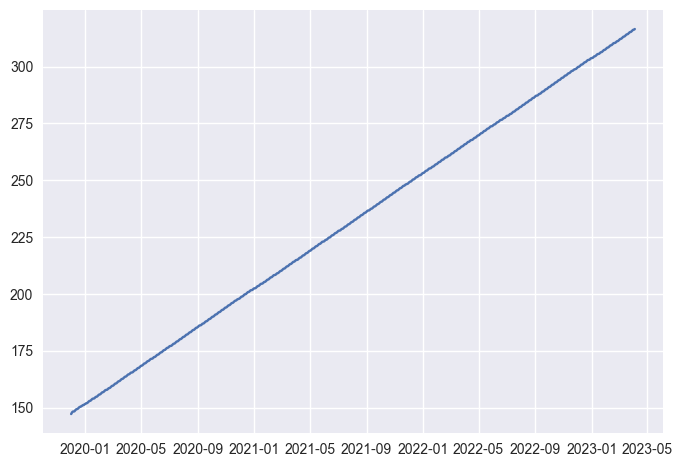

In [12]:
plt.plot(df_pd.index[8500:], preds)
plt.show()